In [1]:
# In this kernel, I am setting up my notebook so that I may run all my functions and add ons appropriately
from scipy import stats
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import prepare_kwame

In [2]:
df, train, validate, test, X_train, X_validate, X_test, y_train, y_validate, y_test = prepare_kwame.prepare_zillow()

In [3]:
df.head()

,parcelid,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,14297519,1727539,3.5,4.0,3100.0,1023282.0
1,17052889,1387261,1.0,2.0,1465.0,464000.0
2,14186244,11677,2.0,3.0,1243.0,564778.0
3,12177905,2288172,3.0,4.0,2376.0,145143.0
4,10887214,1970746,3.0,3.0,1312.0,119407.0


<h3> Hypothesis Testing </h2>

First Hypothesis<br><br>
$H_0$: The number of bathrooms has no correlation on the tax estimated property value.<br>
$H_a$: The number of bathrooms has a correlation with the tax estimated property value.<br>

In [4]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [5]:
# Testing the 1st hypothesis
r, p = stats.pearsonr(df.bathroomcnt, df.taxvaluedollarcnt)
r, p

(0.471765070343626, 0.0)

In [6]:
#Comparing my p value against my α
p < α

True

In [64]:
#stating our results of the pearsons coefficent test
print("Since p is less than α, we reject our null hypothesis that bathroom has no effect on the tax estimated property value.")

Since p is less than α, we reject our null hypothesis that bathroom has no effect on the tax estimated property value.


Second Hypothesis<br><br>
$H_0$: There is no correlation between finished square feet and tax estimated property value.<br>
$H_a$: There is a correlation between finished square feet and tax estimated property value.<br>


In [8]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [9]:
# Testing the 1st hypothesis
r, p = stats.pearsonr(df.calculatedfinishedsquarefeet, df.taxvaluedollarcnt)
r, p

(0.583156301196327, 0.0)

In [10]:
#Comparing my p value against my α
p < α

True

In [66]:
#stating the results of the pearsons coefficent test
print("Since p is less than α, we reject our null hypothesis that there is no correlation between finished square feet and tax estimated property value.")

Since p is less than α, we reject our null hypothesis that there is no correlation between finished square feet and tax estimated property value.


In [12]:
# settting the random seed so that each reproduction will get the same numbers
np.random.seed(76)

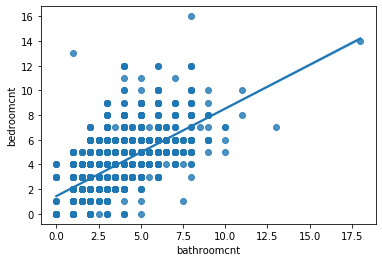

In [36]:
sns.regplot(data= train, x='bathroomcnt', y= 'bedroomcnt')

Text(0.5, 1, 'Relationship Plot of Train Data')

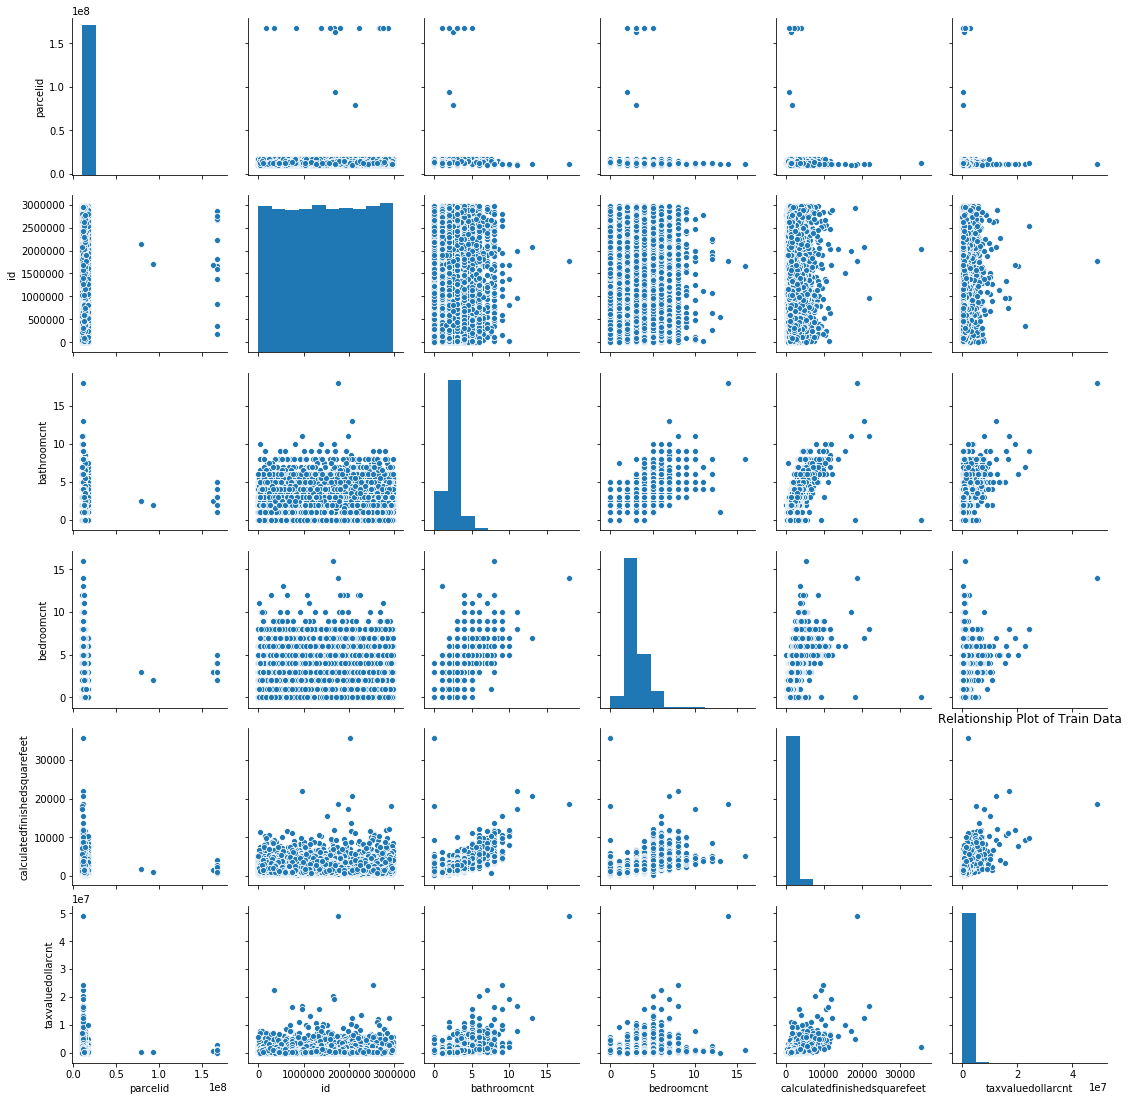

In [14]:
sns.pairplot(data=train)
plt.title('Relationship Plot of Train Data')

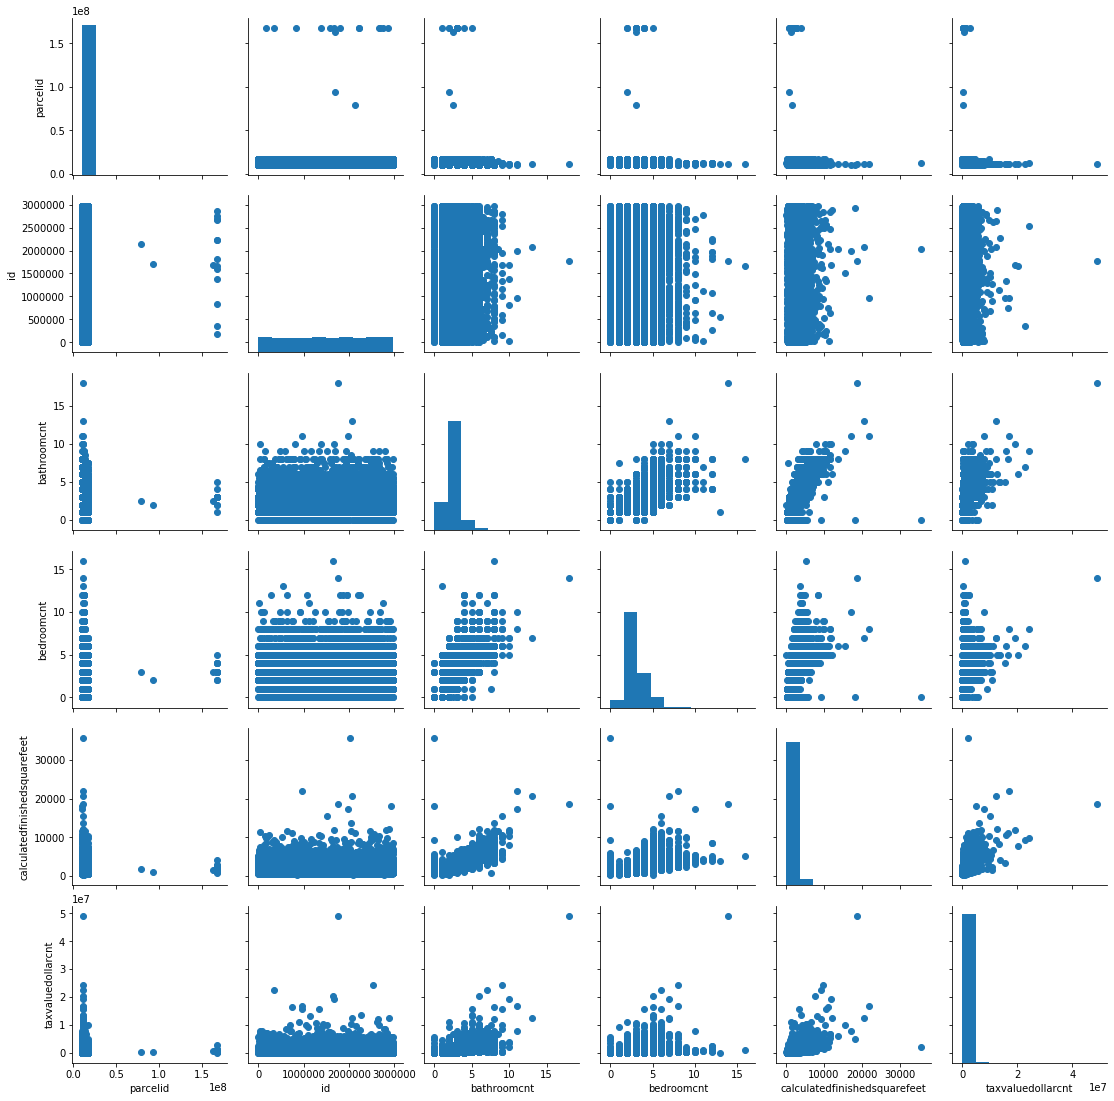

In [20]:
# This is roughly equivalent to sns.jointplot, but we see here that we have the
# flexibility to customize the type of the plots in each position.
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

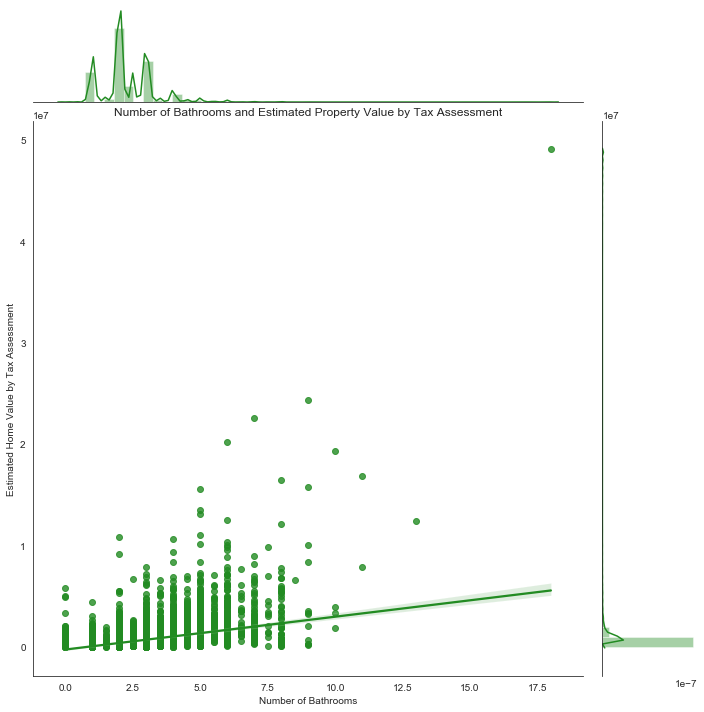

In [28]:
# evaluating tax home value estimate to number of bathrooms
with sns.axes_style('white'):
    j = sns.jointplot( "bathroomcnt", "taxvaluedollarcnt",data=train, kind='reg', height=10, color= 'ForestGreen');
    plt.xlabel('Number of Bathrooms')
    plt.ylabel('Estimated Property Value by Tax Assessment')
    plt.title ('Number of Bathrooms and Estimated Property Value by Tax Assessment')
    plt.show()

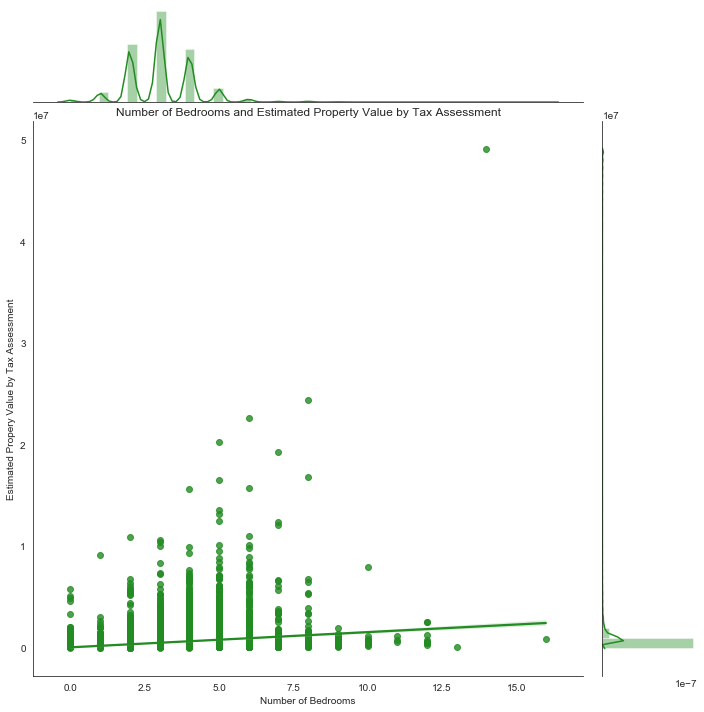

In [38]:
#evaluating tax value assessment to number of bedrooms
with sns.axes_style('white'):
    j = sns.jointplot( "bedroomcnt", "taxvaluedollarcnt",data=train, kind='reg', height=10, color= 'ForestGreen');
    plt.xlabel('Number of Bedrooms')
    plt.ylabel('Estimated Propery Value by Tax Assessment')
    plt.title ('Number of Bedrooms and Estimated Property Value by Tax Assessment')
    plt.show()

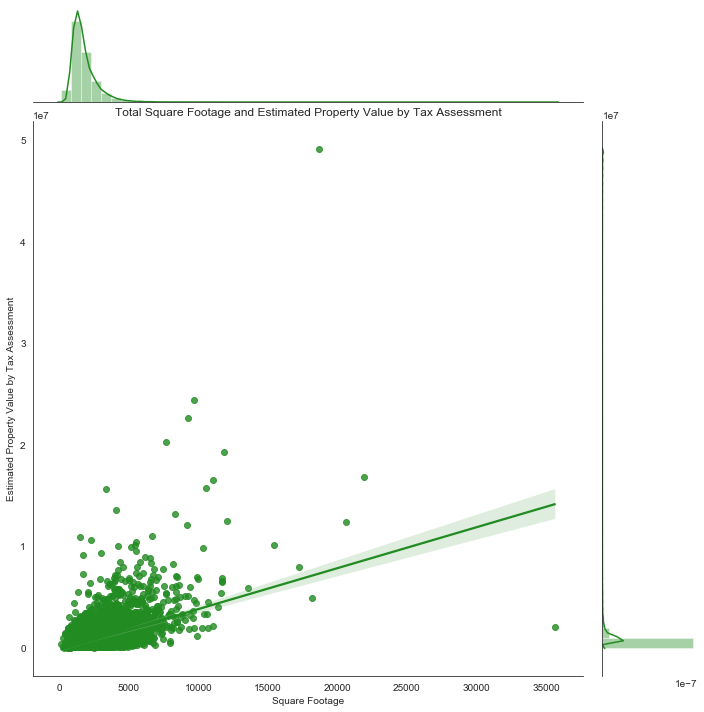

In [27]:
#evaluating tax value assessment to number of bedrooms
with sns.axes_style('white'):
    j = sns.jointplot( "calculatedfinishedsquarefeet", "taxvaluedollarcnt",data=train, kind='reg', height=10, color= 'ForestGreen');
    plt.xlabel('Square Footage')
    plt.ylabel('Estimated Property Value by Tax Assessment')
    plt.title ('Total Square Footage and Estimated Property Value by Tax Assessment')
    plt.show()

In [18]:
train.taxvaluedollarcnt.head()

tax rate*value of the house = tax amount paid

55990     291160.0
6478      429683.0
231      1452674.0
8648       67681.0
32526     358482.0
Name: taxvaluedollarcnt, dtype: float64

(0, 4)

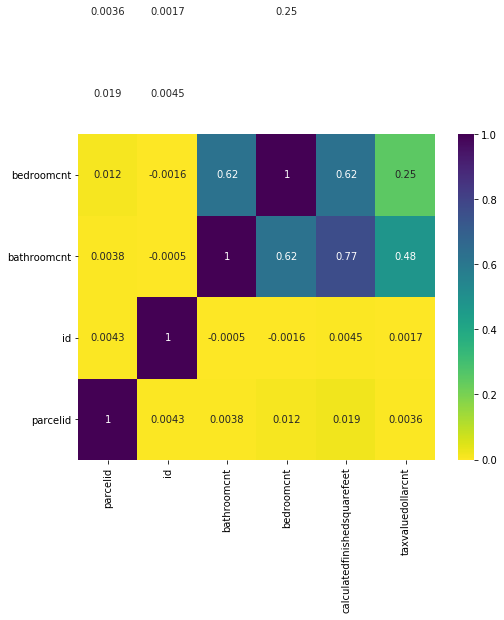

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap='viridis_r', annot=True)
plt.ylim(0, 4)

In [60]:
# sort = false will sort the bin values as opposed to the frequency counts
# value counts of tax_value_dollar_count by binning
train.taxvaluedollarcnt.value_counts(bins=10, sort=False)

(-45803.983, 4909052.2]     43206
(4909052.2, 9814850.4]        102
(9814850.4, 14720648.6]        14
(14720648.6, 19626446.8]        5
(19626446.8, 24532245.0]        3
(24532245.0, 29438043.2]        0
(29438043.2, 34343841.4]        0
(34343841.4, 39249639.6]        0
(39249639.6, 44155437.8]        0
(44155437.8, 49061236.0]        1
Name: taxvaluedollarcnt, dtype: int64

In [37]:
#Making a baseline prediction
df.taxvaluedollarcnt.value_counts()

400000.0    56
600000.0    50
350000.0    49
450000.0    45
420000.0    44
            ..
302897.0     1
144306.0     1
124876.0     1
247786.0     1
98304.0      1
Name: taxvaluedollarcnt, Length: 50811, dtype: int64

Therefore the baseline prediction is that the tax estimated property vaues is $400,000.

In [61]:
!git add "gabby_exploration.ipynb"

In [62]:
!git commit -m "hypothesis wording corrections"

[main 3e3706e] hypothesis wording corrections
 1 file changed, 46 insertions(+), 31 deletions(-)


In [63]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 4 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 24.48 KiB | 1.02 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:The-Property-Estimators/regression-project.git
   e1b3f48..3e3706e  main -> main
